In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import numpy as np
import tkinter
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from statistics import mean
from statistics import stdev as std
import statsmodels.formula.api as sm
pd.set_option("display.max_columns", None)
import statsmodels.api as sm
import matplotlib
import warnings
import statistics

warnings.filterwarnings('ignore')
%matplotlib inline

def merge_fix_cols(df_company,dfroduct,uniqueID):## merge 2 dataframes and remove the duplicate ## 

    df_merged = pd.merge(df_company,
                         dfroduct,
                         how='left',on=uniqueID)    
    for col in df_merged:
        if col.endswith('_x'):
            df_merged.rename(columns = lambda col:col.rstrip('_x'),inplace=True)
        elif col.endswith('_y'):
            to_drop = [col for col in df_merged if col.endswith('_y')]
            df_merged.drop(to_drop,axis=1,inplace=True)
        else:
            pass
    return df_merged




# Auto backward Elimination fucntion##
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(1, numVars):## start from one skip on the intercept ## 
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    print("Reomoved col ",(columns[j]))
                    columns = np.delete(columns, j)
                    
                    
    regressor_OLS.summary()
    return x, columns


def adj_r2 (X,y,yred):
    r_squared=r2_score(y,yred)
    r=(1-r_squared)
    adjusted_r_squared = 1 - (1-r)*(len(y)-1)/(len(y)-X.shape[1]-1)
    return adjusted_r_squared



In [2]:
dataset = pd.read_excel("data - DCB2.xlsx") ## read the csv file ## 
dataset
dataset=dataset.drop(['Unnamed: 0'], axis=1)
dataset=dataset.drop(['Unnamed: 1'], axis=1)
dataset = dataset.drop(dataset.index[[0, 1]])

dataset
dataset=dataset.dropna()

In [3]:
dataset=dataset.rename(columns = { "Unnamed: 2":"Model Properties change" ,
                                  "Unnamed: 3":"UD:E_A",
                                  "Unnamed: 4":"UD:E_T",
                                  "Unnamed: 5":"UD:G_A",
                                  "Unnamed: 6":"UD:G_T",
                                  "Unnamed: 7":"UD:nu_A",
                                  "Unnamed: 8":"UD:nu_T",
                                  "Unnamed: 9":"weave 0/90:E_{11} = E_{33}",
                                  "Unnamed: 10":"weave 0/90:E_{22}",
                                  "Unnamed: 11":"weave 0/90:G_{13}",
                                 "Unnamed: 12":"weave 0/90:G_{21} = G_{23}",
                                 "Unnamed: 13":"weave 0/90:nu_{13}",
                                 "Unnamed: 14":"weave 0/90:nu_{21} = nu_{23}",
                                 "Unnamed: 15":"weave 45:E_{11} = E_{33}",
                                 "Unnamed: 16":"weave 45:E_{22}",
                                 "Unnamed: 17":"weave 45:G_{13}",
                                 "Unnamed: 18":"weave 45:G_{21} = G_{23}",
                                 "Unnamed: 19":"weave 45:nu_{13}",
                                 "Unnamed: 20":"weave 45:nu_{21} = nu_{23}",
                                  "Unnamed: 21":"J-Integral [N/m]"})

##"J-Integral [N/m]"##
# dataset=dataset.drop(['Model Properties change'], axis=1)
# df=dataset
# df

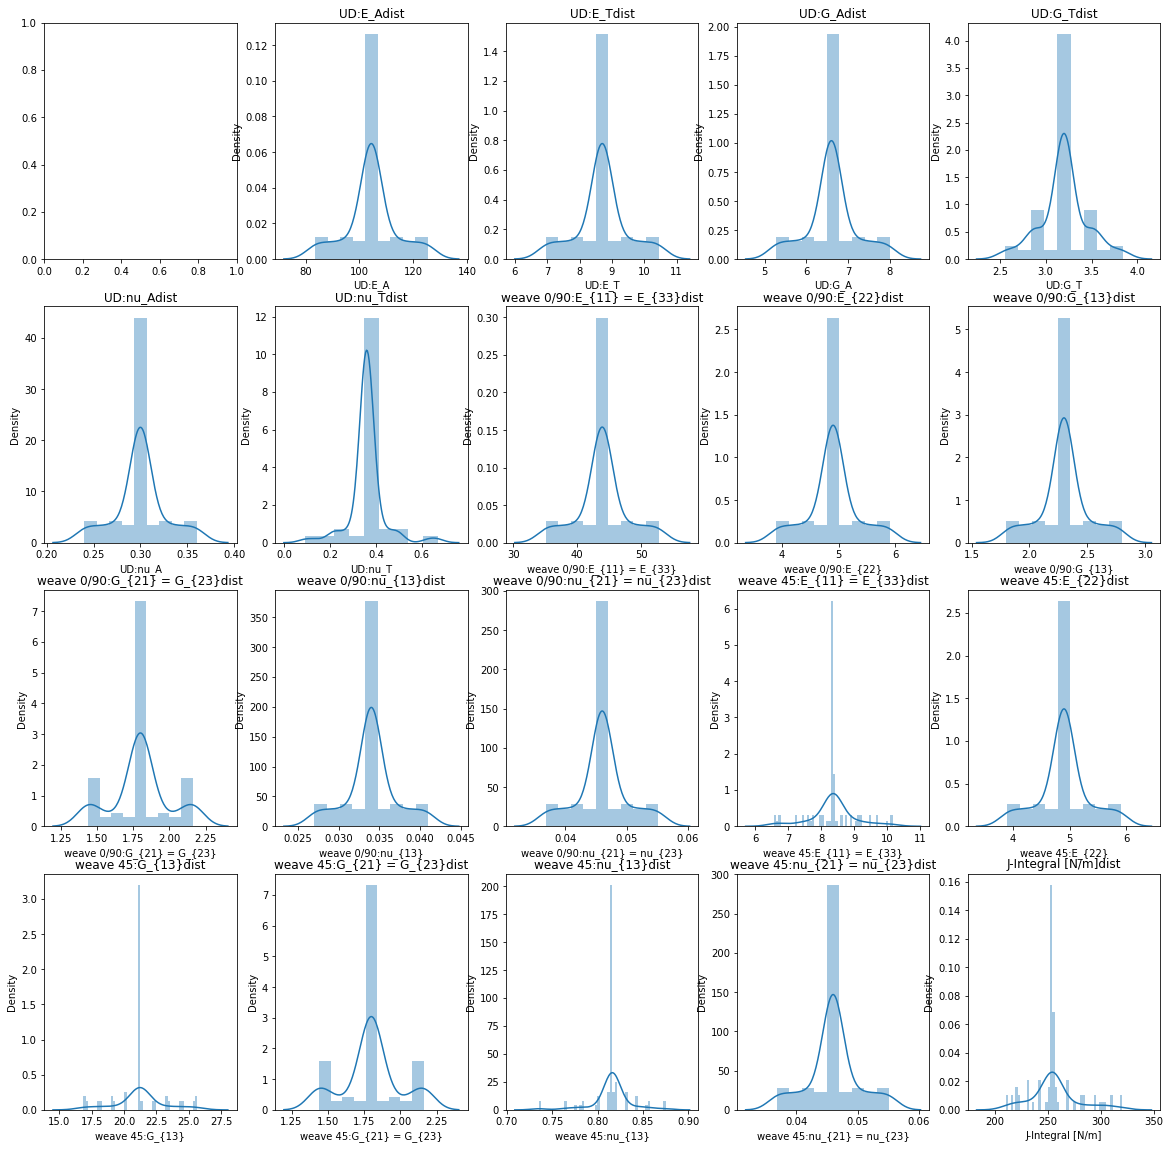

In [4]:

# counter=0
# co=0
# f = plt.figure()
# fig.suptitle('Pokemon Stats by Generation')
# for i in dataset.columns :
#     if i != "Model Properties change":
#         sns.distplot(dataset[i]).set_title(str(i)+"dist")## dist of the postive tests###
#         f.add_subplot(5, 4, co+1)

#         counter=counter +1
#         co=co+1
# #         if counter ==5 :
# #             counter=0 
# #         if counter ==4 :
# #             co=0
# plt.show()


fig, axes = plt.subplots(ncols=5, nrows=4,figsize=(20,20))

for i, ax in zip(dataset.columns, axes.flat):
    if i != "Model Properties change":
         sns.distplot(dataset[i],ax=ax).set_title(str(i)+"dist")## dist of the postive tests###
plt.show()

In [5]:
dummy = pd.get_dummies(dataset['Model Properties change'], prefix='Model Properties change_')
df = pd.merge(
    left=dataset,
    right=dummy,
    left_index=True,
    right_index=True,
)

df
df=df.drop(['Model Properties change'], axis=1)
df

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,UD:nu_T,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23},J-Integral [N/m],Model Properties change__1,Model Properties change__2,Model Properties change__3,Model Properties change__4,Model Properties change__5,Model Properties change__6,Model Properties change__7,Model Properties change__8,Model Properties change__9,Model Properties change__10,Model Properties change__11,Model Properties change__12,Model Properties change__13,Model Properties change__14,Model Properties change__15,Model Properties change__16,Model Properties change__17,Model Properties change__18,Model Properties change__19,Model Properties change__20,Model Properties change__21,Model Properties change__22,Model Properties change__23,Model Properties change__24,Model Properties change__25,Model Properties change__26,Model Properties change__27,Model Properties change__28,Model Properties change__29,Model Properties change__30,Model Properties change__31,Model Properties change__32,Model Properties change__E11,Model Properties change__E11+0.1E11,Model Properties change__E11+0.2E11,Model Properties change__E11-0.1E11,Model Properties change__E11-0.2E11,Model Properties change__E22,Model Properties change__E22+0.1E22,Model Properties change__E22+0.2E22,Model Properties change__E22-0.1E22,Model Properties change__E22-0.2E22,Model Properties change__E_A,Model Properties change__E_A+0.1E_A,Model Properties change__E_A+0.2E_A,Model Properties change__E_A-0.1E_A,Model Properties change__E_A-0.2E_A,Model Properties change__E_T,Model Properties change__E_T+0.1E_T,Model Properties change__E_T+0.2E_T,Model Properties change__E_T-0.1E_T,Model Properties change__E_T-0.2E_T,Model Properties change__G13,Model Properties change__G13+0.1G13,Model Properties change__G13+0.2G13,Model Properties change__G13-0.1G13,Model Properties change__G13-0.2G13,Model Properties change__G21,Model Properties change__G21+0.1G21,Model Properties change__G21+0.2G21,Model Properties change__G21-0.1G21,Model Properties change__G21-0.2G21,Model Properties change__G_A,Model Properties change__G_A+0.1G_A,Model Properties change__G_A+0.2G_A,Model Properties change__G_A-0.1G_A,Model Properties change__G_A-0.2G_A,Model Properties change__G_T,Model Properties change__G_T+0.1G_T,Model Properties change__G_T+0.2G_T,Model Properties change__G_T-0.1G_T,Model Properties change__G_T-0.2G_T,Model Properties change__nu13,Model Properties change__nu13+0.1nu13,Model Properties change__nu13+0.2nu13,Model Properties change__nu13-0.1nu13,Model Properties change__nu13-0.2nu13,Model Properties change__nu21,Model Properties change__nu21+0.1nu21,Model Properties change__nu21+0.2nu21,Model Properties change__nu21-0.1nu21,Model Properties change__nu21-0.2nu21,Model Properties change__nu_A,Model Properties change__nu_A+0.1nu_A,Model Properties change__nu_A+0.2nu_A,Model Properties change__nu_A-0.1nu_A,Model Properties change__nu_A-0.2nu_A
2,83.5,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,260.719,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,94,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,257.353,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,104.4,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046,254.317,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,114.8,8.7,6.6,3.2,0.3,0.36,43.9,4.9,2.3,

<AxesSubplot:>

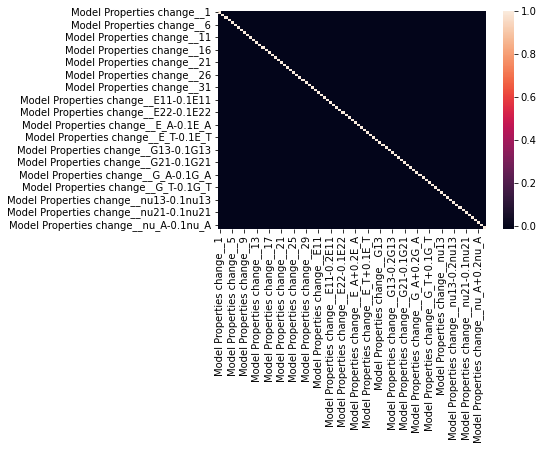

In [6]:
df_corr = df.corr()## show the corr matrix ##
sns.heatmap(df_corr)

In [7]:
y = df.loc[:,"J-Integral [N/m]":"J-Integral [N/m]"].values ## take the y postive
dfn = df.drop(columns=["J-Integral [N/m]"])## drop the y ## 


In [8]:
# Create correlation matrix
corr_matrix = dfn.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
dfn=dfn.drop(dfn[to_drop], axis=1)



In [9]:

prediction_vals = {}# dict for prediction MRSE ##


prediction_vals_r2 = {} #dict for prediction r^2#

prediction_vals_mr2={}#dict for prediction r^2 mean of cross validation#

prediction_vals_std = {}#dict for prediction std of cross validation#


In [10]:
## prediction ## 
x = dfn.values ## last col
x

array([[83.5, 8.7, 6.6, ..., 0, 0, 0],
       [94, 8.7, 6.6, ..., 0, 0, 0],
       [104.4, 8.7, 6.6, ..., 0, 0, 0],
       ...,
       [114.84000000000002, 7.829999999999999, 5.9399999999999995, ...,
        0, 0, 0],
       [120.06, 7.395, 5.609999999999999, ..., 0, 0, 0],
       [125.28, 6.96, 5.28, ..., 0, 0, 0]], dtype=object)

In [11]:
## prediction train test and validate ## 

X_train, X_test, y_train, y_test =train_test_split(x, y, test_size = 0.2,random_state = 42,shuffle=True)

sc = StandardScaler()
X_train_n = sc.fit_transform(X_train)
X_test_n = sc.transform (X_test)


In [12]:
# ###### print("linear regression prediction")
# print("_______________________________________")
# ## same just for the prediction ##

# regressor = LinearRegression()
# regressor.fit(X_train, y_train)

# y_pred = regressor.predict(X_test)## the prediction of postive ## 



# RMSE=sqrt(mean_squared_error(y_pred,y_test))
# score=r2_score(y_test,y_pred)
# print("Root mean_squared_error is",RMSE)
# print("r^2 socre is "+ str(score))

# prediction_vals["linear  regression "]=RMSE
# prediction_vals_r2["linear  regression "]=score

# scores=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
# scores2=cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


# folds=range(1,11)
# plt.plot(folds,scores,color="r")
# plt.title('linear  regression prediction model folds score ')
# plt.xlabel('folds')
# plt.ylabel('scores')
# print ("avg of cross validation score is ",mean(scores))
# print ("std cross validation score is ",std(scores))
# prediction_vals_std["linear  regression "]=std(scores)
# prediction_vals_mr2["linear  regression "]=mean(scores) 

# plt.show()

In [13]:

# print("Polynomial  validation")
# best=0
# d2=0
# rs=[]
# for i in range(2,4):
#     poly_reg = PolynomialFeatures(degree = i)## make polyni,ail##
#     xn = poly_reg.fit_transform(X_train)## make x polynomial##

#     lin_reg_2 = LinearRegression()
#     lin2=lin_reg_2.fit(xn,y_train)

#     #Evalation#
#     yolyred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
#     RMSE = sqrt(mean_squared_error(y_test,yolyred))
#     r2 =r2_score(y_test,yolyred)


# #     if r2>d2 :
#         best=i
#         d2=r2
    
#     rs.append(r2)

# print("-----!!!!!!!")
# print("The Best Dgree is :"+str(best))
# plt.plot(range(2,4),rs)
# plt.title('Polynomial predictions model ')
# plt.xlabel('parameters')
# plt.ylabel('mean_test_score')
# plt.show()


In [14]:
# #polynumial regression using 1dgree as the dgree beacuse lowest std in cross validation & have the highest r^2 ## 

# #prediction ## 

# print("polynumial  test")
# print("_______________________")
# poly_reg = PolynomialFeatures(best)## make polyni,ail##
# xp = poly_reg.fit_transform(X_train)## make x polynomial##

# poly_regressor = LinearRegression()
# poly_regressor.fit(xp, y_train)

# xt = poly_reg.fit_transform(X_test)## make x polynomial##
# y_pred = poly_regressor.predict(xt)## the predication of postive ## 
# error = y_test-y_pred## the postive eror##
# error


# print("_________________")
# RMSE=sqrt(mean_squared_error(y_test,y_pred))
# score=r2_score(y_test,y_pred)
# print("Root mean_squared_error is",RMSE)
# print(" r^2 socre is ",score)

# prediction_vals["polynumial regression"]=RMSE
# prediction_vals_r2["polynumial regression"]=score

# folds=range(1,11)

# scores=cross_val_score(estimator=poly_regressor,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
# scores2=cross_val_score(estimator=poly_regressor,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


# print("_________________")
# plt.plot(folds,scores,color="r")
# plt.title('Polynomial prediction model folds score ')
# plt.xlabel('folds')
# plt.ylabel('scores')
 
# plt.show()
# print ("avg of cross validation score is ",mean(scores))
# print ("std cross validation score is ",std(scores))
# prediction_vals_std["polynumial regression"]=std(scores)
# prediction_vals_mr2["polynumial regression"]=mean(scores)

Ridge prediction stats
_______________________________
best alpha is  Ridge(alpha=0.0)
Root mean_squared_error is 3.265765234467356
r^2 socre is 0.9799238842922594
_________________


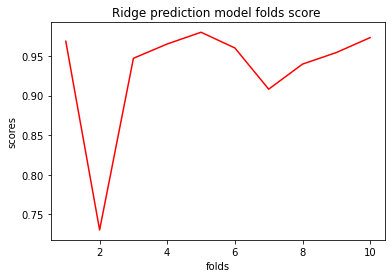

avg of cross validation score is  0.9325838778560477
std cross validation score is  0.07389791124063354


In [15]:
####Ridge##
#prediction####
print("Ridge","prediction stats")
print("_______________________________")
# took from https://machinelearningmastery.com/ridge-regression-with-python/#
from numpy import arange
from pandas import read_csv
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

parameters = {'alpha':arange(0, 10, 0.01)}

# define the model/ estimator
model = Ridge()

# define the grid search
Ridge_reg= GridSearchCV(model, parameters, scoring='r2',cv=10)

Ridge_reg.fit(X_train,y_train)

cvv=pd.DataFrame(Ridge_reg.cv_results_)
# best estimator
print("best alpha is ",Ridge_reg.best_estimator_)

Ridge = Ridge_reg.best_estimator_
Ridge.fit(X_train, y_train)             
pred3 = Ridge.predict(X_test)  
error = y_test-pred3## the postive eror##

RMSE=sqrt(mean_squared_error(y_test,pred3))
score=r2_score(y_test,pred3)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))
prediction_vals["Ridge regression"]=RMSE
prediction_vals_r2["Ridge regression"]=score
folds=range(1,11)

scores=cross_val_score(estimator=Ridge,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=Ridge,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('Ridge prediction model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["Ridge regression"]=std(scores)
prediction_vals_mr2["Ridge regression"]=mean(scores)

Lasso prediction stats
_______________________________
best alpha is  Lasso(alpha=0.02)
Root mean_squared_error is 4.477778251575101
r^2 socre is 0.9622571290246429
_________________


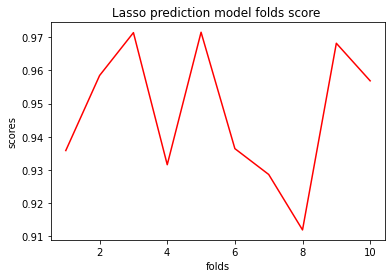

avg of cross validation score is  0.9470960906083418
std cross validation score is  0.020843362644193324


In [16]:
####Lasso##
#prediction####
print("Lasso","prediction stats")
print("_______________________________")

parameters = {'alpha':arange(0, 10, 0.01)}

# define the model/ estimator
model = Lasso()

# define the grid search
Lasso_reg= GridSearchCV(model, parameters, scoring='r2',cv=10)

Lasso_reg.fit(X_train,y_train)

# best estimator
print("best alpha is ",Lasso_reg.best_estimator_)

folds=range(1,11)

lasso = Lasso_reg.best_estimator_# Fit the Lasso model
lasso.fit(X_train, y_train)# Create the model score
lassored=lasso.predict(X_test)
RMSE=sqrt(mean_squared_error(y_test,lassored))
score=r2_score(y_test,lassored)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["Lasso regression"]=RMSE
prediction_vals_r2["Lasso regression"]=score

folds=range(1,11)

scores=cross_val_score(estimator=lasso,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=lasso,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try scoring=‘r2’


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('Lasso prediction model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["Lasso regression"]=std(scores)
prediction_vals_mr2["Lasso regression"]=mean(scores)



Fitting 2 folds for each of 360 candidates, totalling 720 fits
best parms XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=3, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Root mean_squared_error is 1.0286695208175796
r^2 socre is 0.9980081276128518
_________________


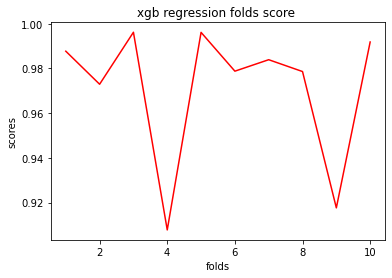

avg of cross validation score is  0.9711339333853994
std cross validation score is  0.0318216615058202


In [17]:
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],},
         
grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=True,
                   scoring='r2')
# defining parameter range
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
#print(grid.grid_scores_)
print("best parms",grid.best_estimator_)

xgb_model=grid.best_estimator_
xgb_model.fit(X_train, y_train)
yred_xgb = xgb_model.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,yred_xgb))
score=r2_score(y_test,yred_xgb)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["xgb regression "]=RMSE
prediction_vals_r2["xgb regression "]=score
folds=range(1,11)

scores=cross_val_score(estimator=xgb_model,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
scores2=cross_val_score(estimator=xgb_model,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try s


print("_________________")
plt.plot(folds,scores,color="r")
plt.title('xgb regression folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["xgb regression "]=std(scores)
prediction_vals_mr2["xgb regression "]=mean(scores)

In [18]:
from sklearn.svm import SVR


prediction svr 
_______________________________
Best parameters are  SVR(C=1.5, epsilon=0.5, gamma=1e-07, kernel='linear')
Root mean_squared_error is 4.159986807952139
r^2 socre is 0.967424306214619
_________________


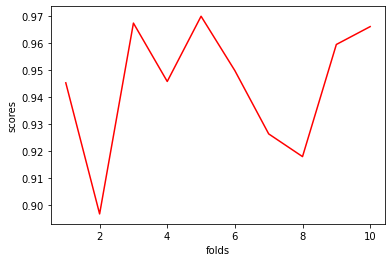

avg of cross validation score is  0.9444239761550619
std cross validation score is  0.024071276025419277


In [19]:
print("prediction svr ")
print("_______________________________")
param_grid = {'max_depth':[1,5,10,15,20,None],'n_estimators':range(1,150)}
regressor = SVR(kernel = 'rbf')
param_grid = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
grid = GridSearchCV(estimator = regressor, param_grid = param_grid, cv = 10,n_jobs=-1)
g_search=grid.fit(X_train, y_train);
print("Best parameters are ",grid.best_estimator_)

svr =g_search.best_estimator_
# fit the model on the whole dataset
svr.fit(X_train, y_train)

yred = svr.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,yred))
score=r2_score(y_test,yred)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))

prediction_vals["svr regression "]=RMSE
prediction_vals_r2["svr regression "]=score


folds=range(1,11)

scores=cross_val_score(estimator=svr,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’


scores2=cross_val_score(estimator=svr,X=X_train,y=y_train,cv=10,scoring='neg_mean_squared_error') #you can also try s


print("_________________")
plt.plot(folds,scores,color="r")
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))
prediction_vals_std["svr regression "]=std(scores)
prediction_vals_mr2["svr regression "]=mean(scores)

best k {'metric': 'manhattan', 'n_neighbors': 1}
Root mean_squared_error is 5.373350072347792
r^2 socre is 0.9456499386758931
_________________


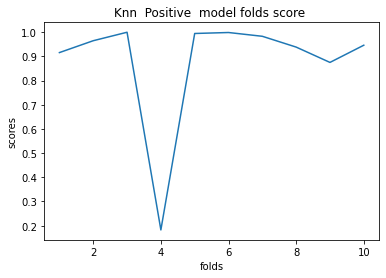

avg of cross validation score is  0.8799293947837841
std cross validation score is  0.24836999304003934


In [20]:
knn = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
n_neighbors = range(1, 70, 1)
metric = ['manhattan']
param_grid = dict(n_neighbors=n_neighbors,metric=metric)

  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='r2',)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)
print("best k",grid.best_params_)

knn_model_p=grid.best_estimator_
knn_model_p.fit(X_train, y_train)
y_pred_knn = knn_model_p.predict(X_test)

RMSE=sqrt(mean_squared_error(y_test,y_pred_knn))
score=r2_score(y_test,y_pred_knn)
print("Root mean_squared_error is",RMSE)
print("r^2 socre is "+ str(score))


prediction_vals["Knn regression "]=RMSE
prediction_vals_r2["Knn regression "]=score

scores=cross_val_score(estimator=knn_model_p,X=X_train,y=y_train,cv=10,scoring='r2') #you can also try scoring=‘r2’
print("_________________")
plt.plot(folds,scores)
plt.title('Knn  Positive  model folds score ')
plt.xlabel('folds')
plt.ylabel('scores')
 
plt.show()
print ("avg of cross validation score is ",mean(scores))
print ("std cross validation score is ",std(scores))

prediction_vals_std["Knn regression "]=std(scores)
prediction_vals_mr2["Knn regression "]=mean(scores)


In [21]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_regression
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold
# from sklearn.linear_model import LinearRegression
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.ensemble import StackingRegressor
# from matplotlib import pyplot
# from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV


# # get a stacking ensemble of models
# def get_stacking():
# # define the base models
#     level0 = list()
#     level0.append(('knn', KNeighborsRegressor()))
#     level0.append(('cart', DecisionTreeRegressor()))
#     level0.append(('svm', SVR()))
#     level0.append(('ridge', Ridge()))   
#     level0.append(('Lasso', Lasso())) 
#     # define meta learner model
#     level1 = LinearRegression()
#     # define the stacking ensemble
#     model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
#     return model
 
# # get a list of models to evaluate
# def get_models():
#     models = dict()
#     models['knn'] = KNeighborsRegressor()
#     models['cart'] = DecisionTreeRegressor()
#     models['svm'] = SVR()
#     models['Ridge'] = Ridge()
#     models['Lasso'] = Lasso()
#     models['stacking'] = get_stacking()
#     return models
 
# # evaluate a given model using cross-validation
# def evaluate_model(model, X, y):
#     cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#     scores = cross_val_score(model, x, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
#     return scores
 

# models = get_models()
# # evaluate the models and store results
# results, names = list(), list()
# for name, model in models.items():
#     scores = evaluate_model(model,x, y)
#     results.append(scores,color="r")
#     names.append(name)
#     print('>%s %.3f (%.3f)' % (name,+ mean(scores,color="r"), std(scores)))
# # plot model performance for comparison
# pyplot.boxplot(results, labels=names, showmeans=True)
# pyplot.show()


In [22]:
prediction_vals_r2

{'Ridge regression': 0.9799238842922594,
 'Lasso regression': 0.9622571290246429,
 'xgb regression ': 0.9980081276128518,
 'svr regression ': 0.967424306214619,
 'Knn regression ': 0.9456499386758931}

In [23]:
df1 = pd.DataFrame(list(prediction_vals_r2.items()), columns=['name', 'r2_score'])
df2 = pd.DataFrame(list(prediction_vals.items()), columns=['name', 'RMSE_score'])
df5=pd.DataFrame(list(prediction_vals_std.items()), columns=['name', 'std_score'])
df7=pd.DataFrame(list(prediction_vals_mr2.items()), columns=['name', 'mean_kfold_r^2'])

df_chart=merge_fix_cols(df1,df2,'name')
df_chart=merge_fix_cols(df_chart,df5,'name')
df_chart=merge_fix_cols(df_chart,df7,'name')
df_chart

,name,r2_score,RMSE_score,std_score,mean_kfold_r^2
0,Ridge regression,0.979924,3.265765,0.073898,0.932584
1,Lasso regression,0.962257,4.477778,0.020843,0.947096
2,xgb regression,0.998008,1.028670,0.031822,0.971134
3,svr regression,0.967424,4.159987,0.024071,0.944424
4,Knn regression,0.945650,5.373350,0.248370,0.879929


In [24]:
## random forest and knn made big fail ## 

In [25]:
## the best mode to use is Lasso ## 

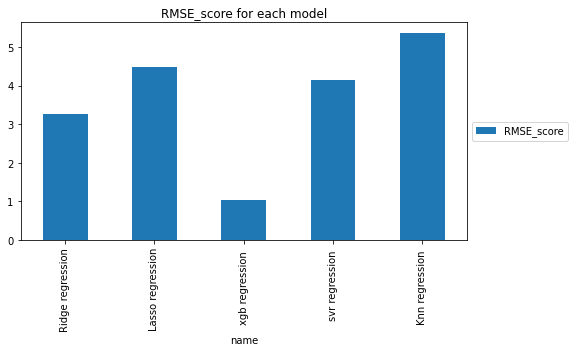

In [41]:
df_chart.plot(x ='name', y=["RMSE_score"], kind = 'bar')

plt.title('RMSE_score for each model')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),prop={"size":10})## THE LEGEND ##
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

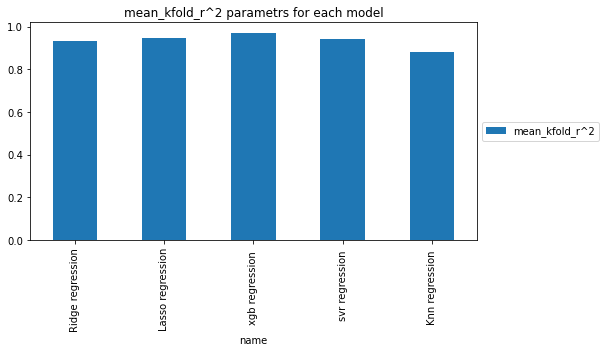

In [42]:
df_chart.plot(x ='name', y=["mean_kfold_r^2"], kind = 'bar')

plt.title('mean_kfold_r^2 parametrs for each model')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5),prop={"size":10})## THE LEGEND ##
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

In [28]:
##pycart for checking##

In [29]:
#dataset.columns

In [30]:
#import pycaret
#from pycaret.regression import *

In [31]:
#exp_reg101 = setup(data = dataset,numeric_features=['UD:E_A', 'UD:E_T', 'UD:G_A', 'UD:G_T',
     #  'UD:nu_A', 'UD:nu_T', 'weave 0/90:E_{11} = E_{33}', 'weave 0/90:E_{22}',
     #  'weave 0/90:G_{13}', 'weave 0/90:G_{21} = G_{23}', 'weave 0/90:nu_{13}',
     #  'weave 0/90:nu_{21} = nu_{23}', 'weave 45:E_{11} = E_{33}',
     #  'weave 45:E_{22}', 'weave 45:G_{13}', 'weave 45:G_{21} = G_{23}',
     #  'weave 45:nu_{13}', 'weave 45:nu_{21} = nu_{23}'], target = "Target") 


In [32]:
#best = compare_models()


In [33]:
#CBR = create_model('ridge')


In [34]:
#tuned_CBR = tune_model(CBR,n_iter = 50)


In [35]:
#plot_model(tuned_CBR)


In [36]:
#Feature importace ##
fet_im = {} #dict for prediction r^2#

importance = xgb_model.feature_importances_
# summarize feature importance
counter=0
for i,v in enumerate(importance):
    if v > 0.0 :
        print(("Feature name: "+dfn.columns[counter]),"/Feature number: "+str(i),"/Feature importance: "+str(v))
        fet_im[dfn.columns[counter]]=v
    counter=counter+1
        



Feature name: UD:E_A /Feature number: 0 /Feature importance: 0.07667664
Feature name: UD:E_T /Feature number: 1 /Feature importance: 0.00012048973
Feature name: UD:G_A /Feature number: 2 /Feature importance: 0.0011122555
Feature name: UD:G_T /Feature number: 3 /Feature importance: 0.016300112
Feature name: UD:nu_A /Feature number: 4 /Feature importance: 0.014021184
Feature name: weave 0/90:E_{11} = E_{33} /Feature number: 6 /Feature importance: 0.28335425
Feature name: weave 0/90:E_{22} /Feature number: 7 /Feature importance: 0.0034207494
Feature name: weave 0/90:G_{13} /Feature number: 8 /Feature importance: 0.008976803
Feature name: weave 0/90:G_{21} = G_{23} /Feature number: 9 /Feature importance: 0.034617033
Feature name: weave 0/90:nu_{13} /Feature number: 10 /Feature importance: 0.0030558354
Feature name: weave 0/90:nu_{21} = nu_{23} /Feature number: 11 /Feature importance: 0.021677073
Feature name: weave 45:E_{11} = E_{33} /Feature number: 12 /Feature importance: 0.014407541
Fea

In [37]:
fet_im
df_fet_im= pd.DataFrame(list(fet_im.items()), columns=['feature_name', 'importance'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'UD:E_A'),
  Text(1, 0, 'UD:E_T'),
  Text(2, 0, 'UD:G_A'),
  Text(3, 0, 'UD:G_T'),
  Text(4, 0, 'UD:nu_A'),
  Text(5, 0, 'weave 0/90:E_{11} = E_{33}'),
  Text(6, 0, 'weave 0/90:E_{22}'),
  Text(7, 0, 'weave 0/90:G_{13}'),
  Text(8, 0, 'weave 0/90:G_{21} = G_{23}'),
  Text(9, 0, 'weave 0/90:nu_{13}'),
  Text(10, 0, 'weave 0/90:nu_{21} = nu_{23}'),
  Text(11, 0, 'weave 45:E_{11} = E_{33}'),
  Text(12, 0, 'weave 45:E_{22}'),
  Text(13, 0, 'weave 45:G_{13}'),
  Text(14, 0, 'weave 45:G_{21} = G_{23}'),
  Text(15, 0, 'weave 45:nu_{13}'),
  Text(16, 0, 'weave 45:nu_{21} = nu_{23}')])

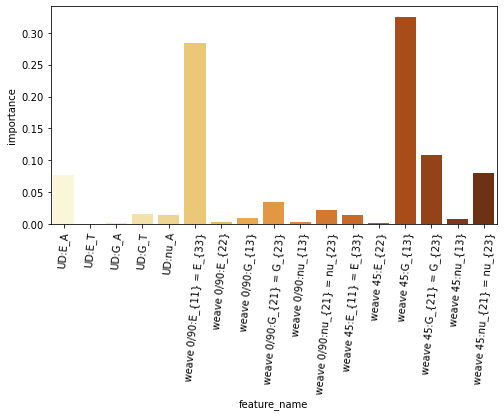

In [38]:
# plot feature importance
sns.barplot(x = 'feature_name',
            y = 'importance',
            data = df_fet_im,
            palette = "YlOrBr")
plt.xticks(rotation=85)


In [39]:
import pickle
file_name = "xgb_reg.pkl"

# save
pickle.dump(xgb_model, open("DCM_XGBOOST_trained_Model", "wb"))

# # load
# xgb_model_loaded = pickle.load(open(file_name, "rb"))

# # test
# ind = 1
# test = X_val[ind]
# xgb_model_loaded.predict(test)[0] == xgb_model.predict(test)[0]

# Out[1]: True

In [40]:
df_imp=dfn[fet_im.keys()] ## just important features ## 
df_imp

,UD:E_A,UD:E_T,UD:G_A,UD:G_T,UD:nu_A,weave 0/90:E_{11} = E_{33},weave 0/90:E_{22},weave 0/90:G_{13},weave 0/90:G_{21} = G_{23},weave 0/90:nu_{13},weave 0/90:nu_{21} = nu_{23},weave 45:E_{11} = E_{33},weave 45:E_{22},weave 45:G_{13},weave 45:G_{21} = G_{23},weave 45:nu_{13},weave 45:nu_{21} = nu_{23}
2,83.5,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
3,94,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
4,104.4,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
5,114.8,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
6,125.3,8.7,6.6,3.2,0.3,43.9,4.9,2.3,1.8,0.034,0.046,8.354,4.9,21.228,1.8,0.816,0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,99.18,9.135,6.93,3.52,0.285,41.705,5.145,2.415,1.44,0.0357,0.0437,8.641,5.145,20.125,1.44,0.8,0.0437
85,109.62,8.265,6.27,2.88,0.315,46.095,4.655,2.185,2.16,0.0323,0.0483,8.056,4.655,22.335,2.16,0.831,0.0483
86,114.84,7.83,5.94,2.88,0.33,48.29,4.41,2.07,2.16,0.0306,0.0506,7.747,4.41,23.42,2.16,0.844,0.0506
87,120.06,7.395,5.61,2.88,0.345,50.485,4.165,1.955,2.16,0.0289,0.0529,7.429,4.165,24.538,2.16,0.857,0.0529
